# Analyse user response data

In [52]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import json
import shap

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
responses = []
with open("trial_data2_3_3_2019.csv") as f:
    lines = f.readlines()
    for line in lines:
        parts = line.replace('""', "'").replace('"', "").split(",", maxsplit=3)
        user_id,hit_id = parts[0].split(":")
        data = json.loads(parts[3].replace("'", '"'))
        data["user_id"] = user_id
        data["hit_id"] = hit_id
        if user_id != "A1VIB2NEKBZUKQ": # skip data from my own tests
            responses.append(data)
        

In [72]:
def get_allocations(responses, mark):
    allocs = {}
    for r in responses:
        if r["mark"] == mark:
            id = str(r["fever_credit"]) + " / " + str(r["cough_credit"]) + " / " + str(r["headache_credit"])
            allocs[id] = allocs.get(id, 0) + 1
    return allocs

In [83]:
mark_titles = {
    "questionA0_stop": "Human XOR + linear allocation for T/T",
    "questionA1_stop": "Human XOR + linear allocation for F/T",
    "questionA2_stop": "Human XOR + linear allocation for F/F",
    "questionB0_stop": "Human AND + linear allocation for T/T",
    "questionB1_stop": "Human AND + linear allocation for F/T",
    "questionB2_stop": "Human AND + linear allocation for F/F",
    "questionC0_stop": "Human OR + linear allocation for T/T",
    "questionC1_stop": "Human OR + linear allocation for F/T",
    "questionC2_stop": "Human OR + linear allocation for F/F",
    "questionD0_stop": "Human SUM allocation for T/T",
    "questionD1_stop": "Human SUM allocation for F/T",
    "questionD2_stop": "Human SUM allocation for F/F"
}
def plot_allocations(responses, mark):
    allocs = get_allocations(responses, mark)
    ks = list(allocs.keys())
    vs = [allocs[k] for k in ks]
    inds = np.argsort(-np.array(vs))
    pl.title(mark_titles.get(mark, ""), fontsize=13)
    pl.bar([ks[i] for i in inds[:1]], [vs[i] for i in inds[:1]], linewidth=0, color=shap.plots.colors.blue_rgb)
    pl.bar([ks[i] for i in inds[1:]], [vs[i] for i in inds[1:]], linewidth=0, color=shap.plots.colors.gray_rgb)
    for tick in pl.gca().get_xticklabels():
        tick.set_rotation(90)
    pl.ylabel("Number of respondents", fontsize=13)
    pl.xlabel("Values entered by respondents\n(fever / cough / headache)", fontsize=13)
    pl.gca().xaxis.set_ticks_position('bottom')
    pl.gca().yaxis.set_ticks_position('left')
    pl.gca().spines['right'].set_visible(False)
    pl.gca().spines['top'].set_visible(False)
    #pl.show()

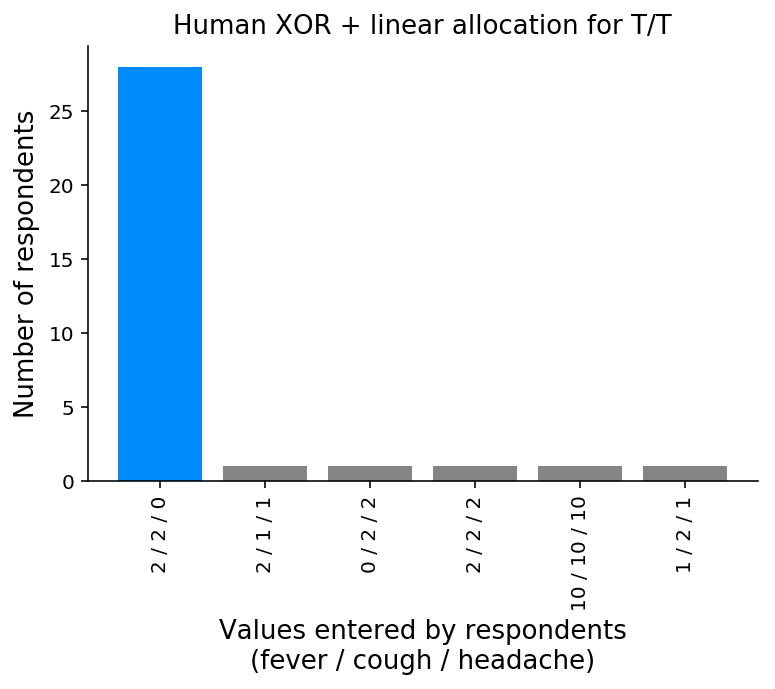

In [80]:
plot_allocations(responses, marks[0])

In [6]:
get_allocations(responses, "questionA0_stop")

{'2 2 0': 28, '2 1 1': 1, '0 2 2': 1, '2 2 2': 1, '10 10 10': 1, '1 2 1': 1}

In [7]:
marks = [
    "questionA0_stop", "questionA1_stop", "questionA2_stop",
    "questionB0_stop", "questionB1_stop", "questionB2_stop",
    "questionC0_stop", "questionC1_stop", "questionC2_stop",
    "questionD0_stop", "questionD1_stop", "questionD2_stop"
]

In [91]:
import sklearn
import shap
import numpy as np
import graphviz

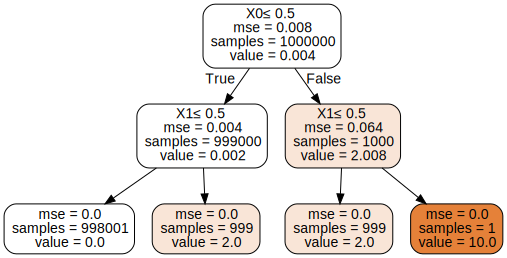

In [109]:
# build data
N = 1000000
M = 3
X = np.zeros((N,M))
X.shape
y = np.zeros(N)
X[0:1000, 0] = 1
y[0:1000] = 2
for i in range(0,1000000,1000):
    X[i, 1] = 1
    y[i] = 2
y[0] = 10
    
# y[1] = 8
# X[2, 0:2] = 1
# y[2] = 4

# fit model
xor_model = sklearn.tree.DecisionTreeRegressor(max_depth=2)
xor_model.fit(X, y)

X_test = np.array([[1., 1., 1.]])
#out = model.predict(X_test)

# draw model
dot_data = sklearn.tree.export_graphviz(xor_model, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

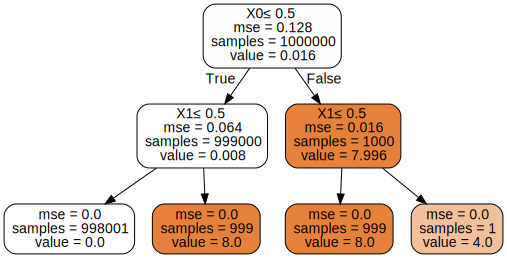

In [108]:
# build data
N = 1000000
M = 3
X = np.zeros((N,M))
X.shape
y = np.zeros(N)
X[0:1000, 0] = 1
y[0:1000] = 8
for i in range(0,1000000,1000):
    X[i, 1] = 1
    y[i] = 8
y[0] = 4
    
# y[1] = 8
# X[2, 0:2] = 1
# y[2] = 4

# fit model
xor_model = sklearn.tree.DecisionTreeRegressor(max_depth=2)
xor_model.fit(X, y)

X_test = np.array([[1., 1., 1.]])
#out = model.predict(X_test)

# draw model
dot_data = sklearn.tree.export_graphviz(xor_model, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

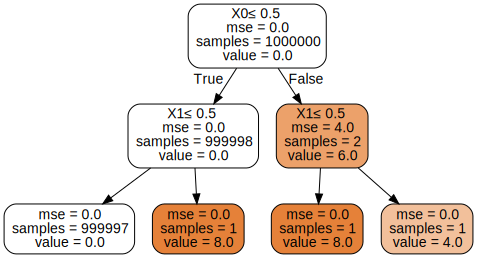

In [104]:
# build data
N = 1000000
M = 3
X = np.zeros((N,M))
X.shape
y = np.zeros(N)
X[0, 0] = 1
y[0] = 8
X[1, 1] = 1
y[1] = 8
X[2, 0:2] = 1
y[2] = 4

# fit model
xor_model = sklearn.tree.DecisionTreeRegressor(max_depth=2)
xor_model.fit(X, y)

X_test = np.array([[1., 1., 1.]])
    out = model.predict(X_test)

# draw model
dot_data = sklearn.tree.export_graphviz(xor_model, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [105]:
xor_model

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

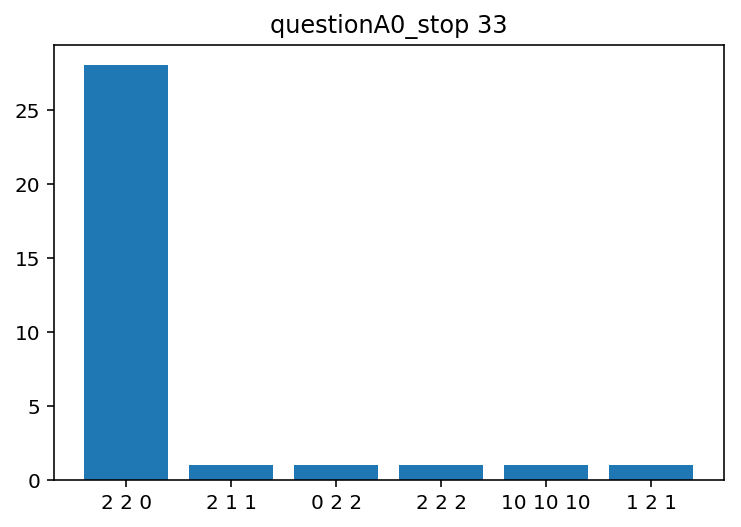

In [8]:
plot_allocations(responses, marks[0])

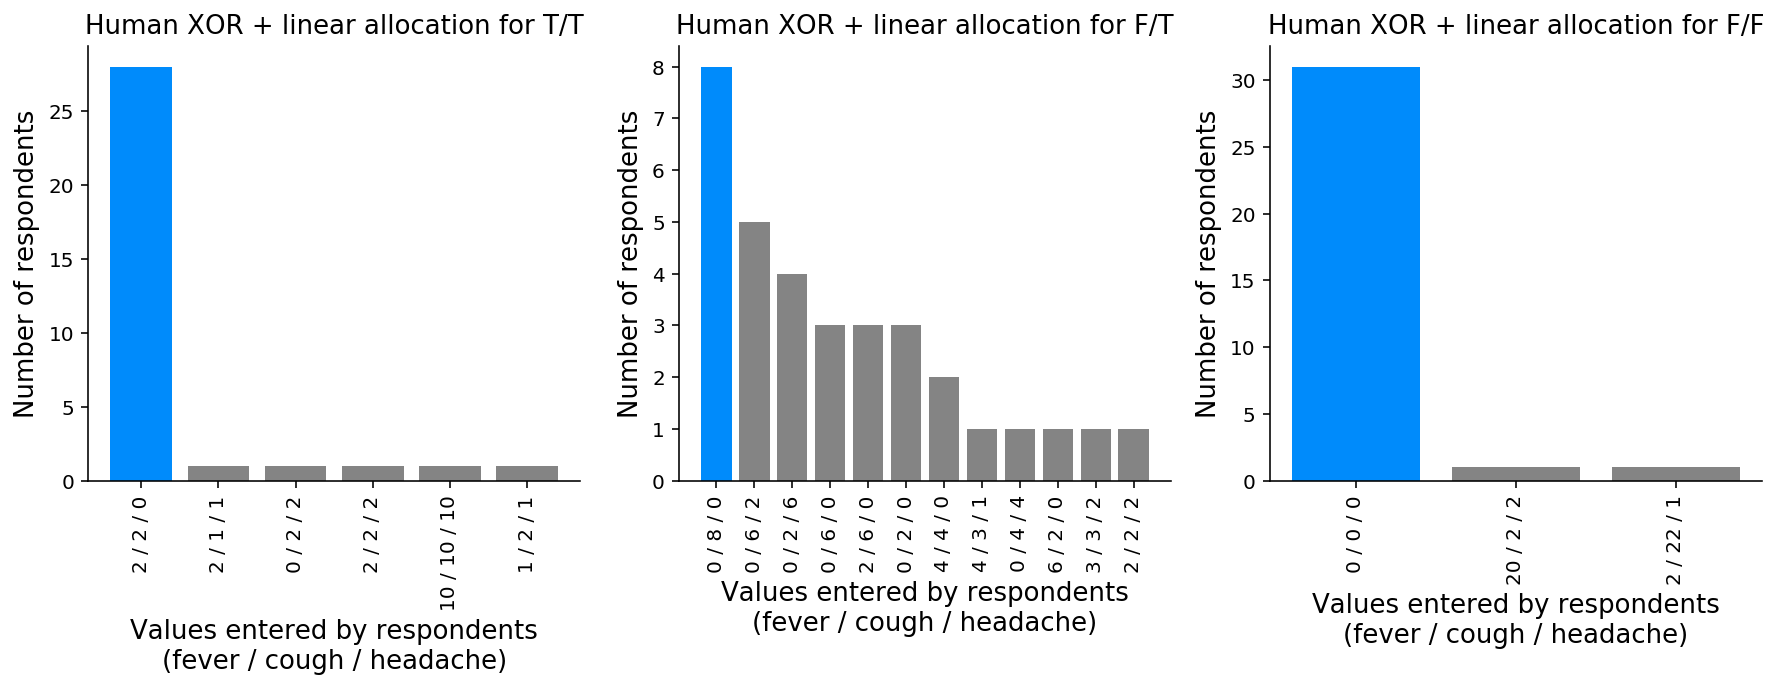

In [87]:
pl.figure(figsize=(15,4))

pl.subplot(1,3,1)
plot_allocations(responses, marks[0])
pl.subplot(1,3,2)
plot_allocations(responses, marks[1])
pl.subplot(1,3,3)
plot_allocations(responses, marks[2])
pl.savefig("human_xor_survey.pdf")
pl.show()

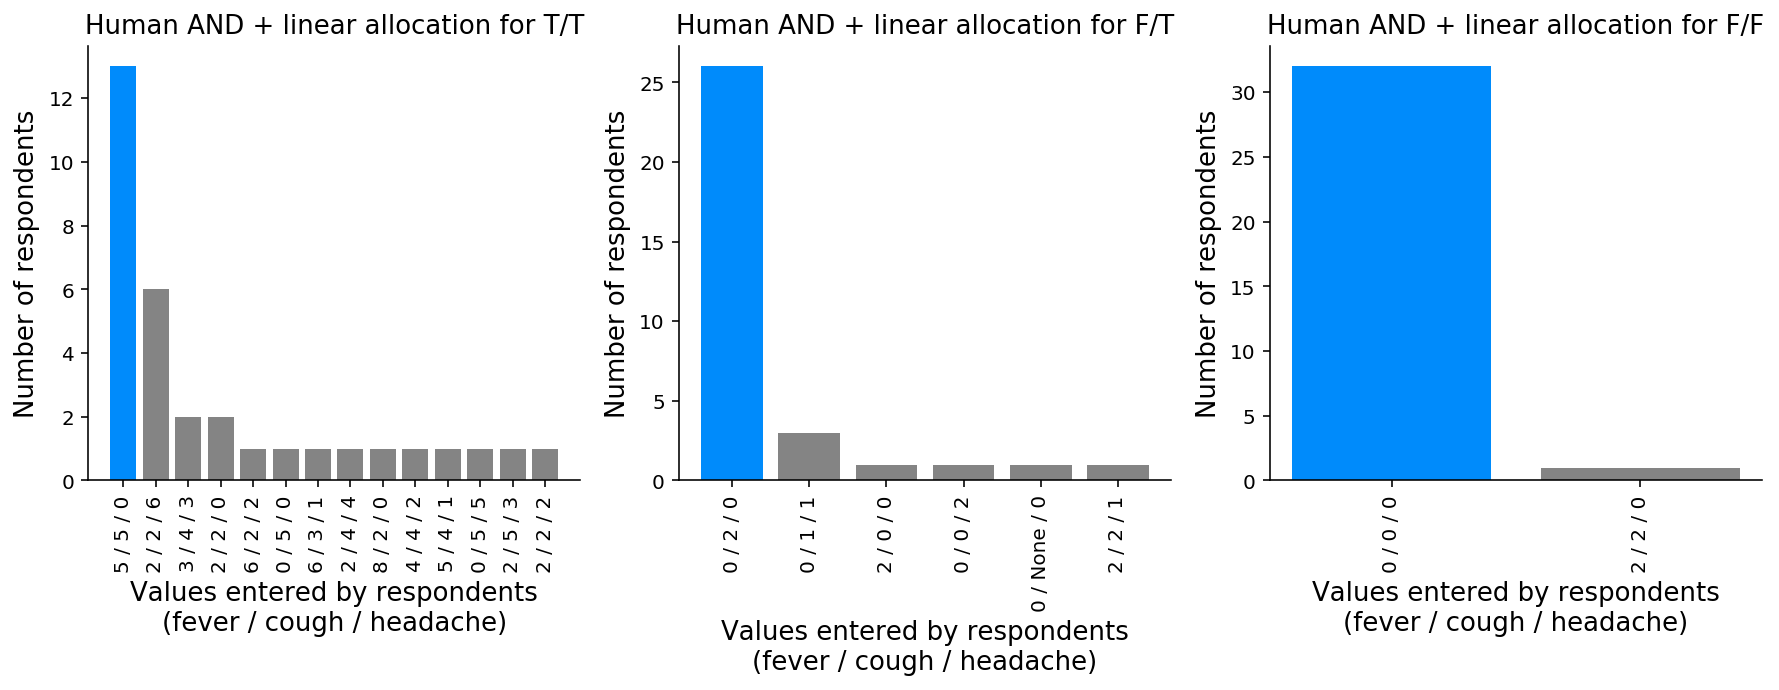

In [88]:
pl.figure(figsize=(15,4))

pl.subplot(1,3,1)
plot_allocations(responses, marks[3])
pl.subplot(1,3,2)
plot_allocations(responses, marks[4])
pl.subplot(1,3,3)
plot_allocations(responses, marks[5])
pl.savefig("human_and_survey.pdf")
pl.show()

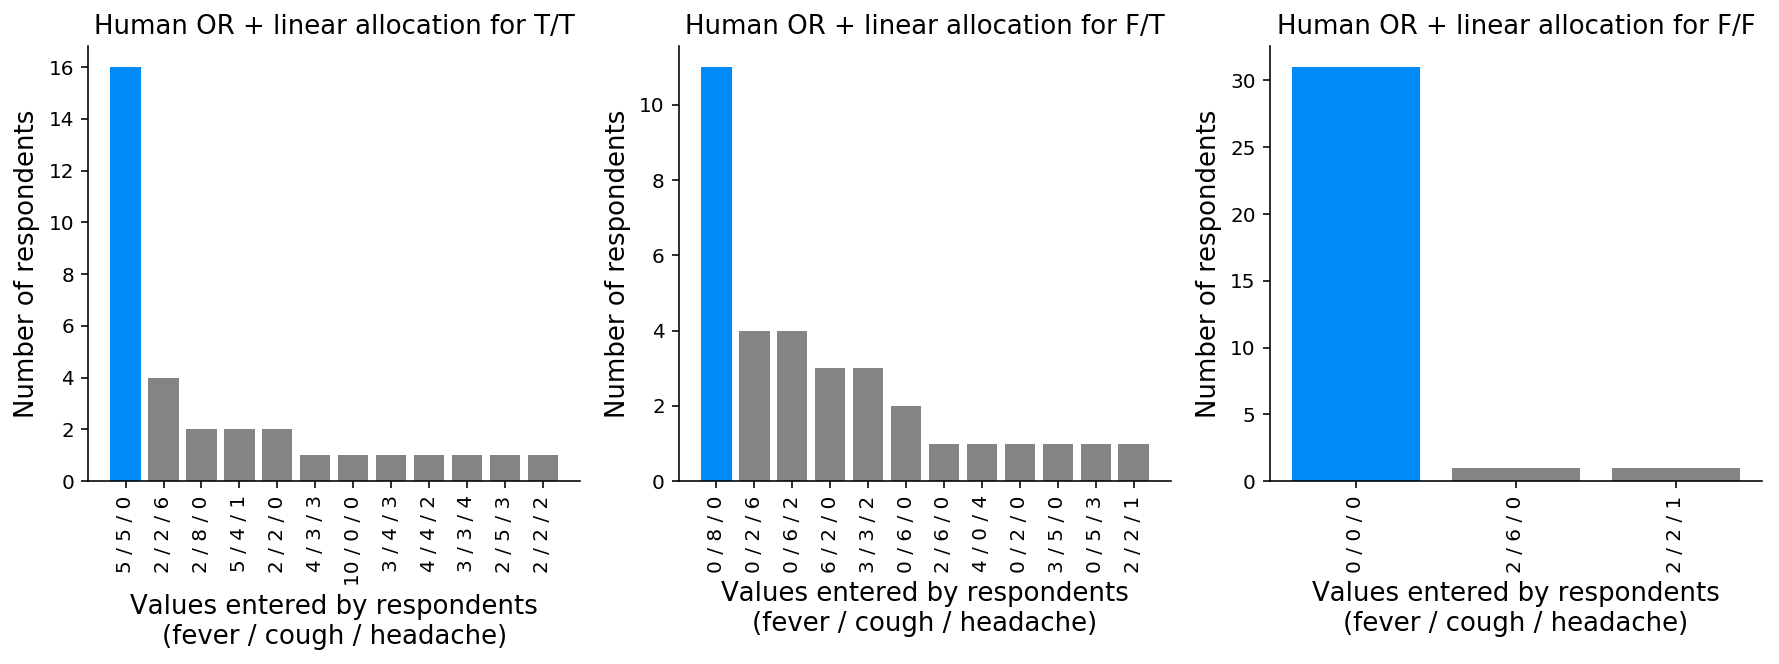

In [89]:
pl.figure(figsize=(15,4))

pl.subplot(1,3,1)
plot_allocations(responses, marks[6])
pl.subplot(1,3,2)
plot_allocations(responses, marks[7])
pl.subplot(1,3,3)
plot_allocations(responses, marks[8])
pl.savefig("human_or_survey.pdf")
pl.show()

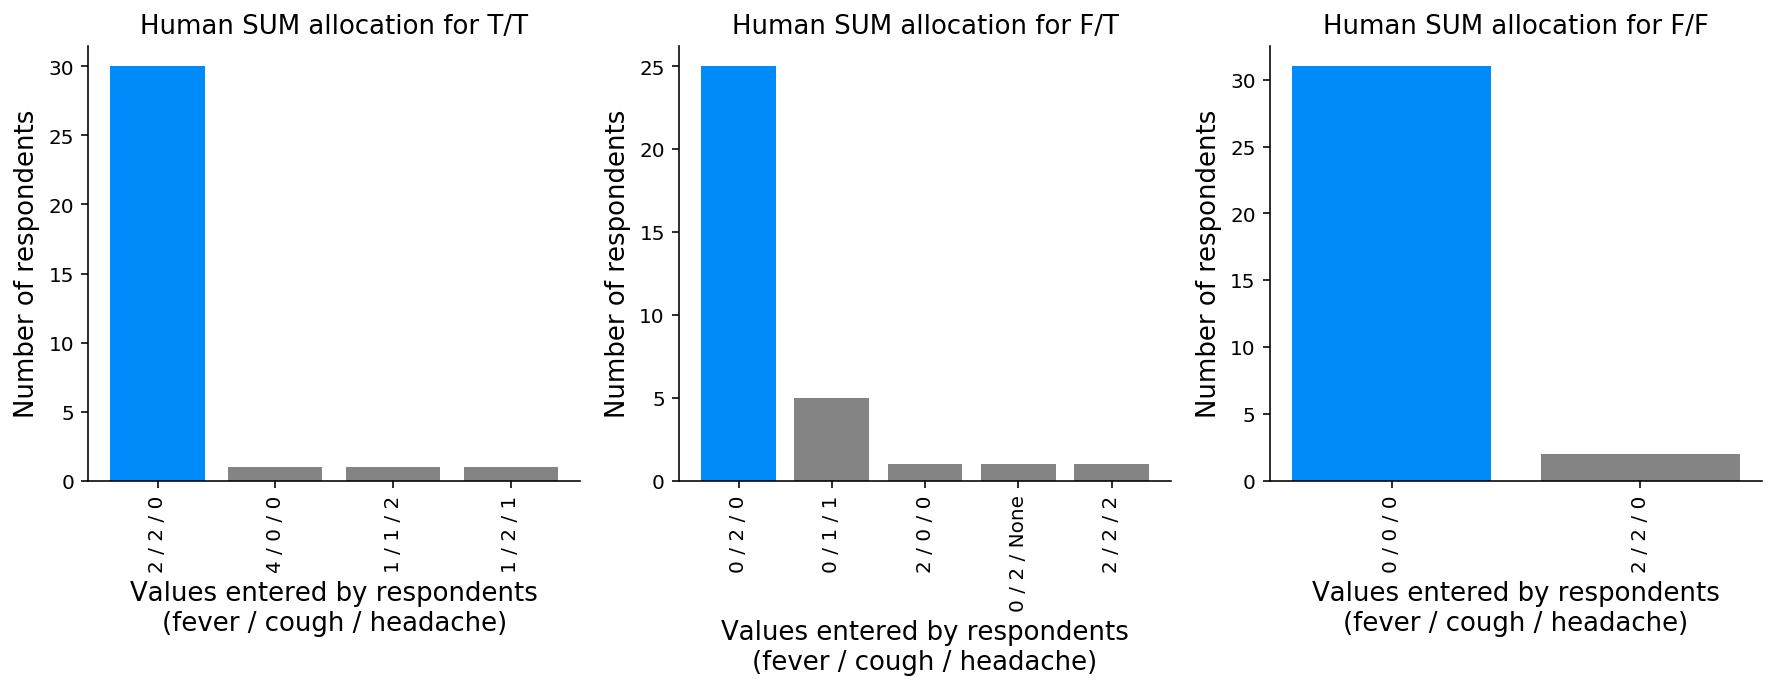

In [90]:
pl.figure(figsize=(15,4))

pl.subplot(1,3,1)
plot_allocations(responses, marks[9])
pl.subplot(1,3,2)
plot_allocations(responses, marks[10])
pl.subplot(1,3,3)
plot_allocations(responses, marks[11])
pl.savefig("human_sum_survey.pdf")
pl.show()

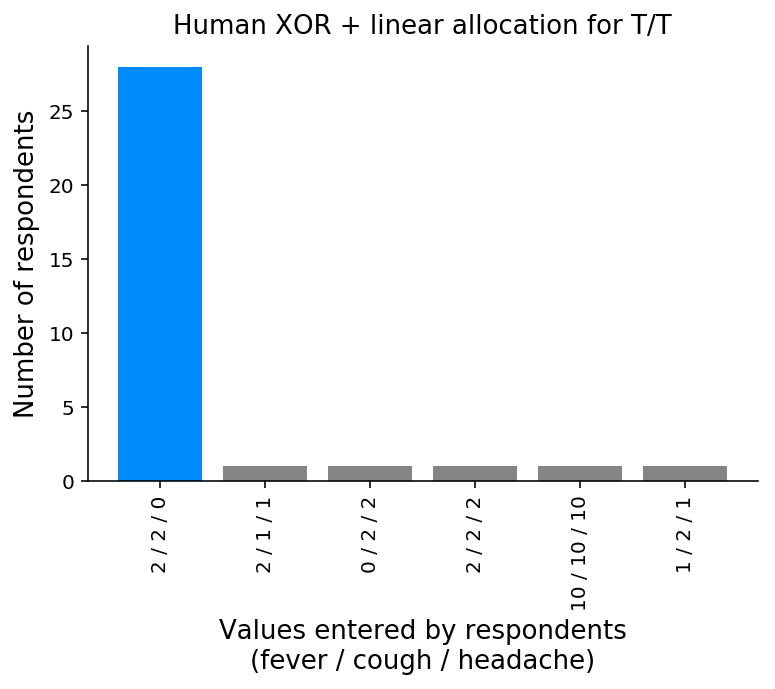

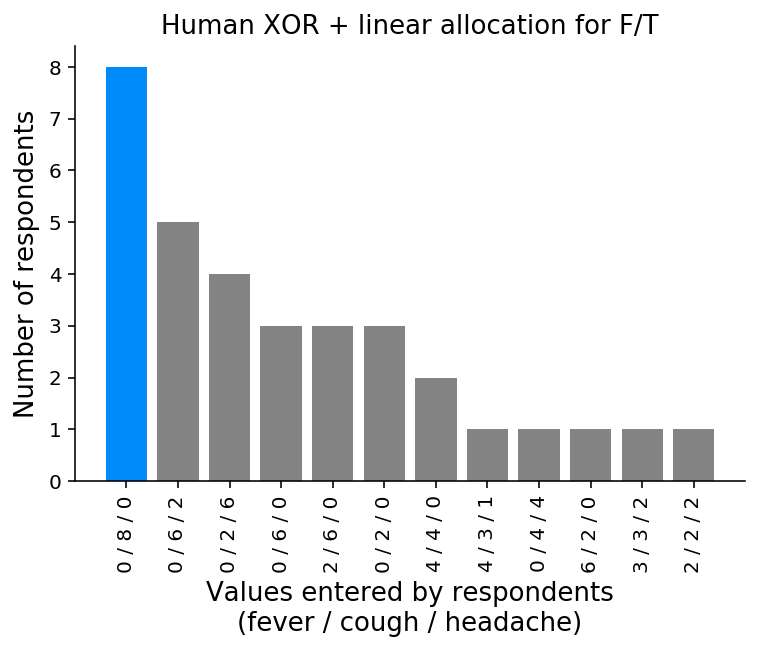

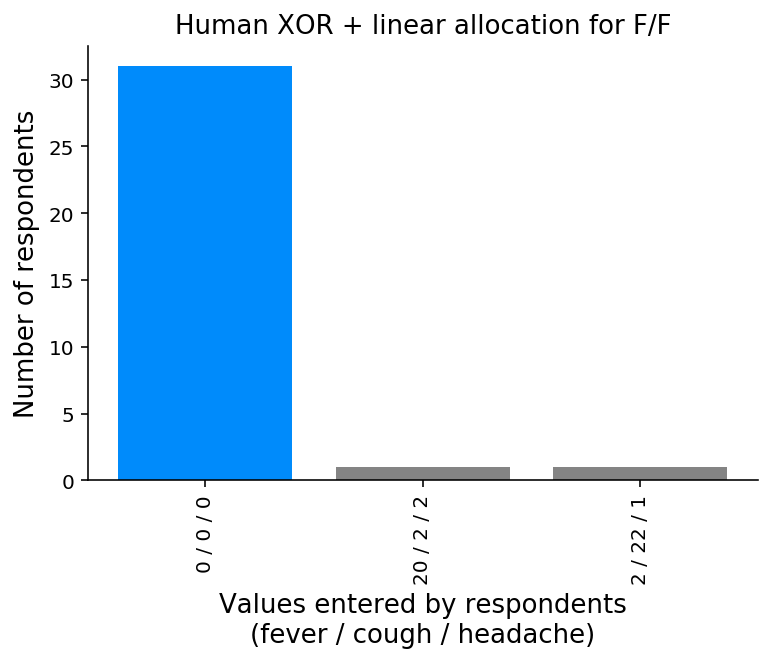

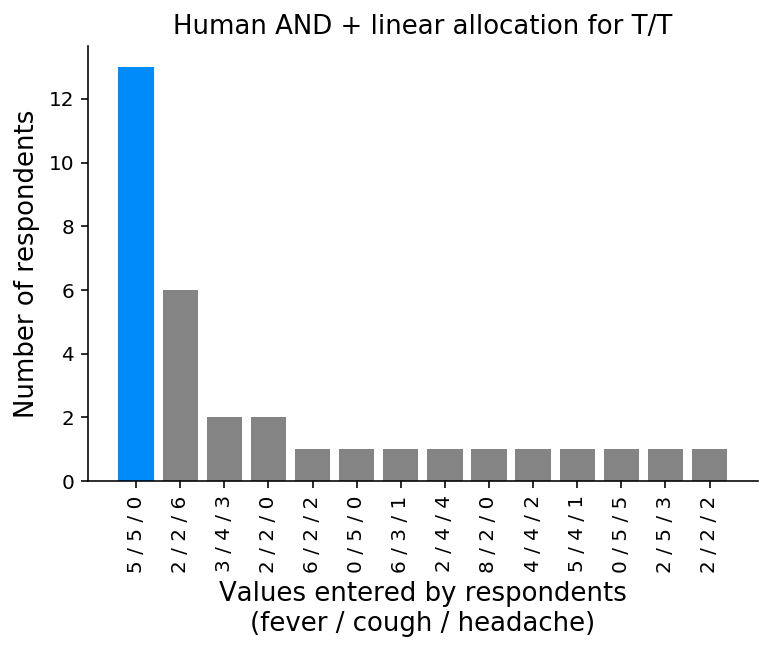

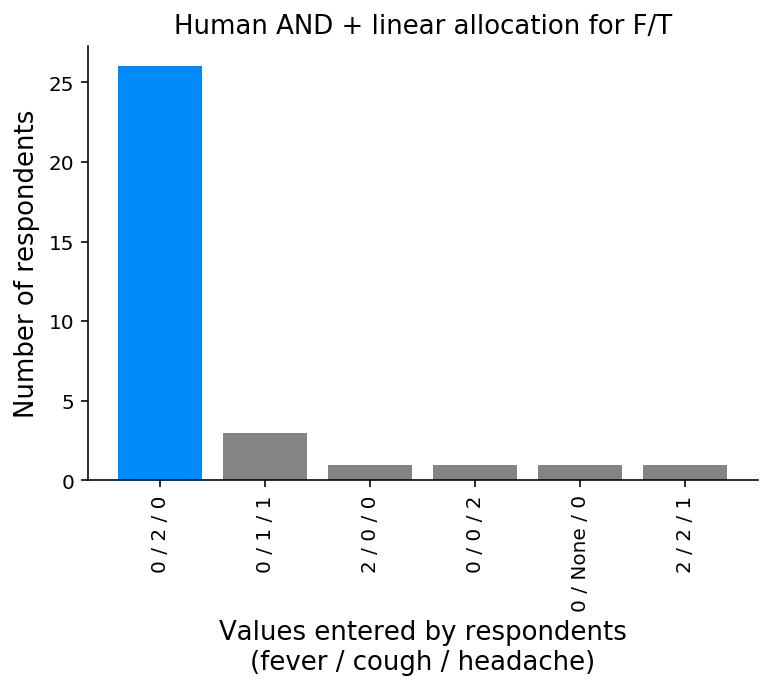

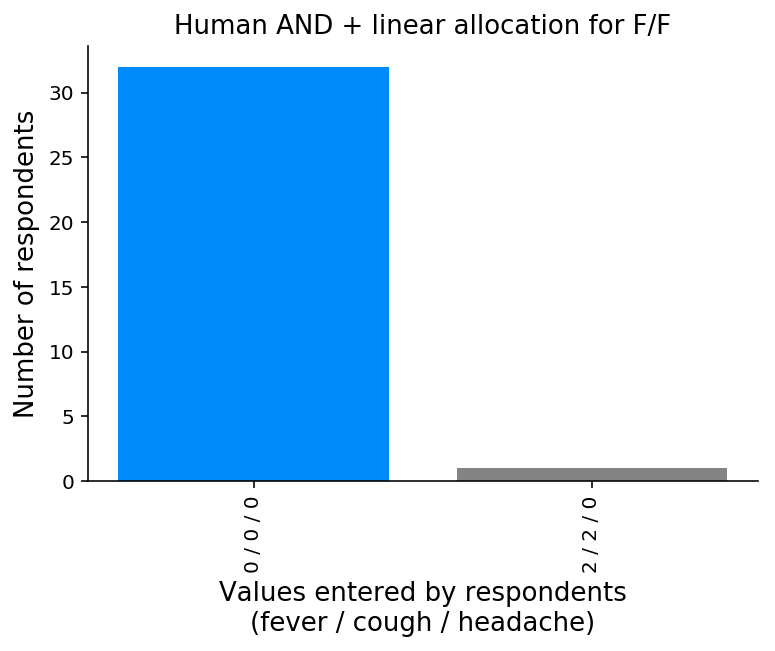

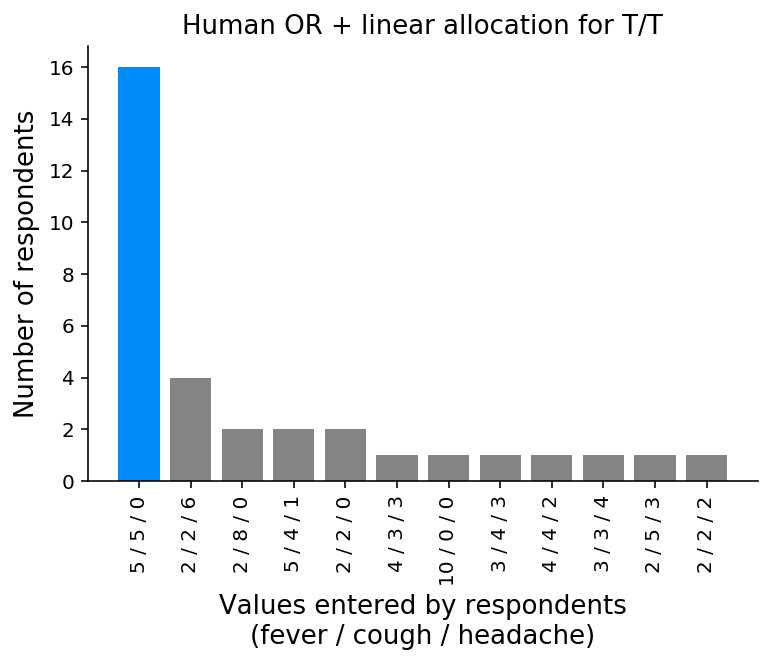

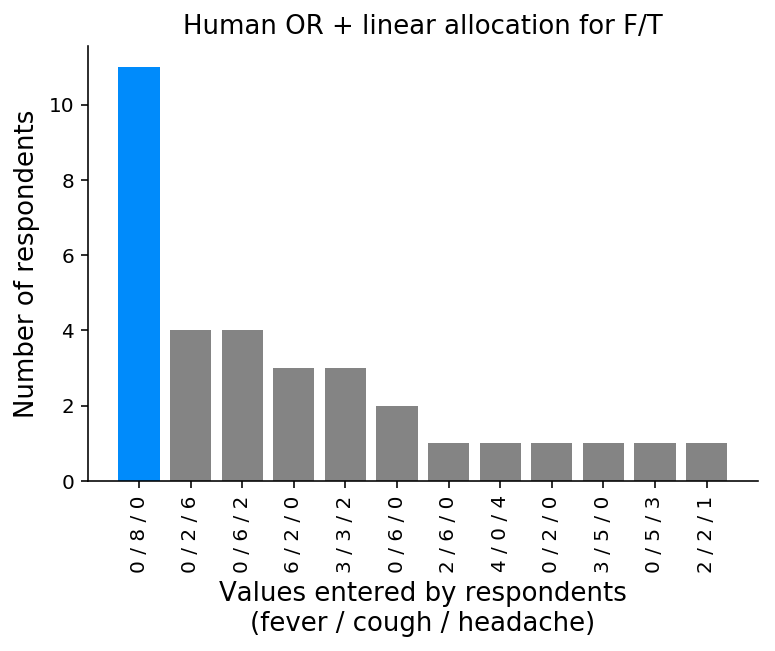

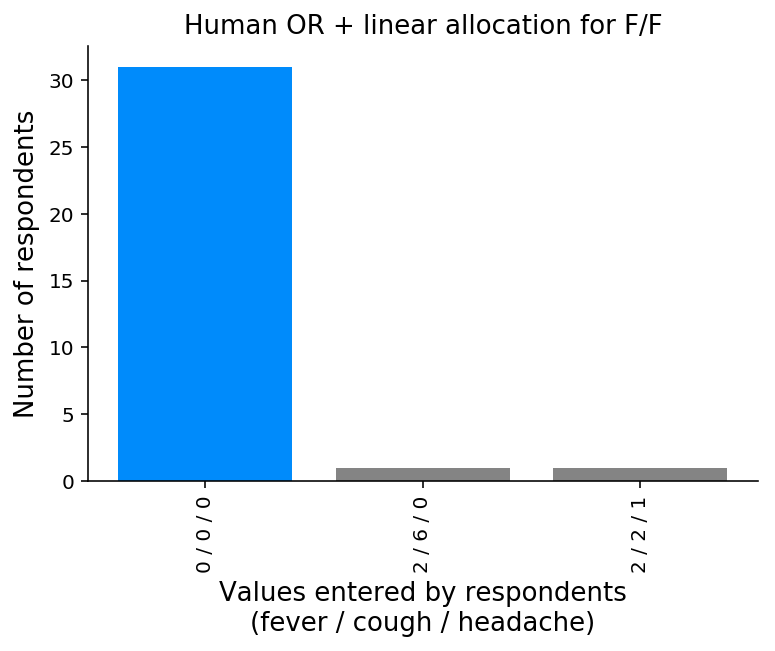

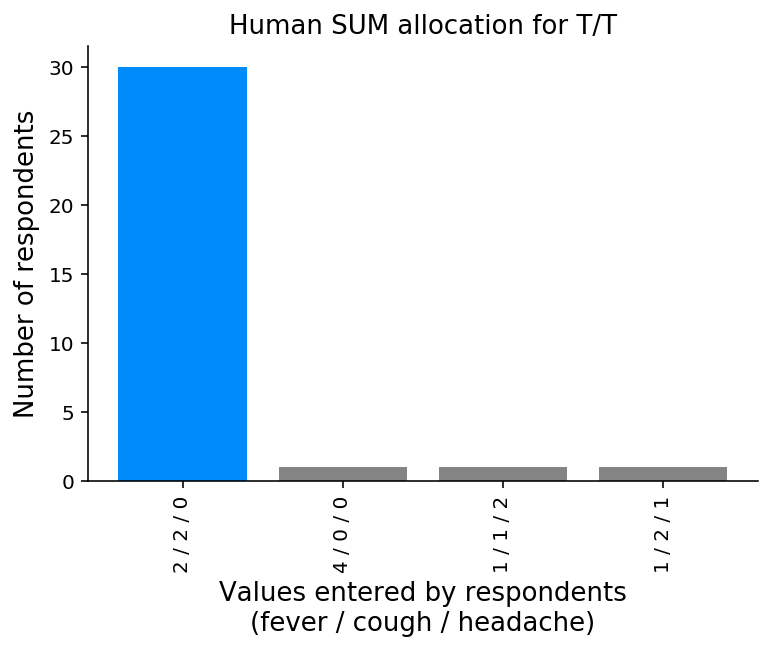

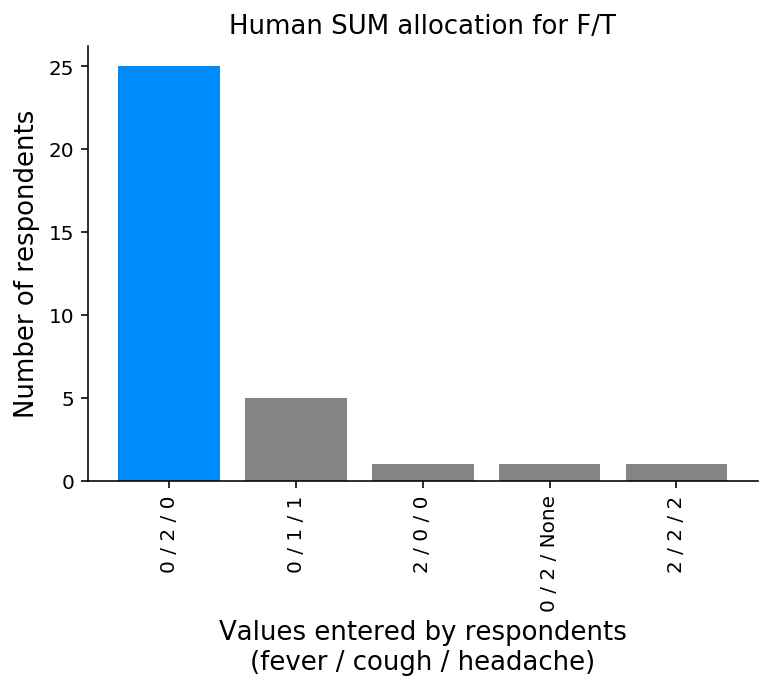

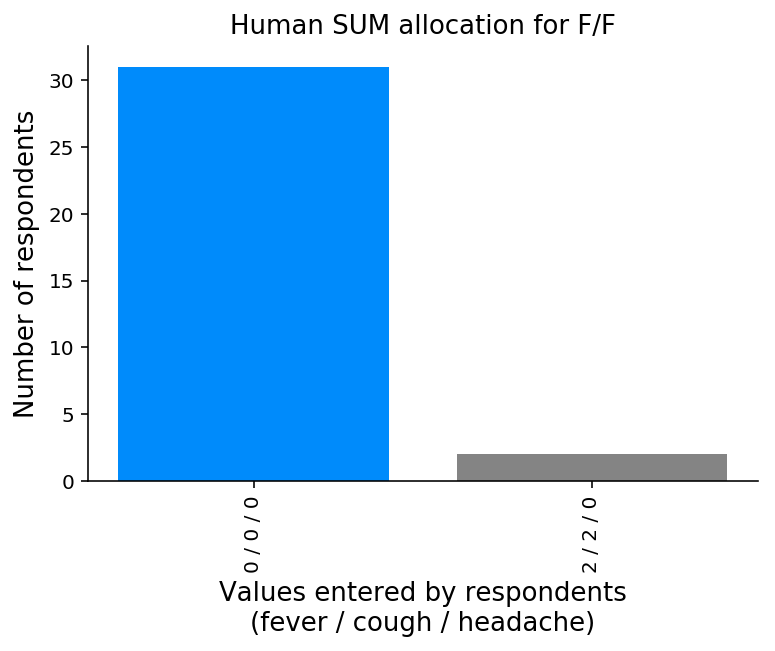

In [82]:
for m in marks:
    plot_allocations(responses, m)

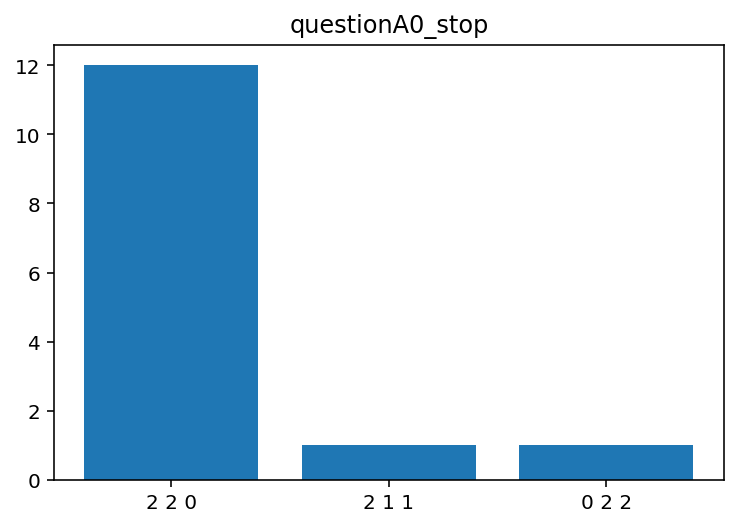

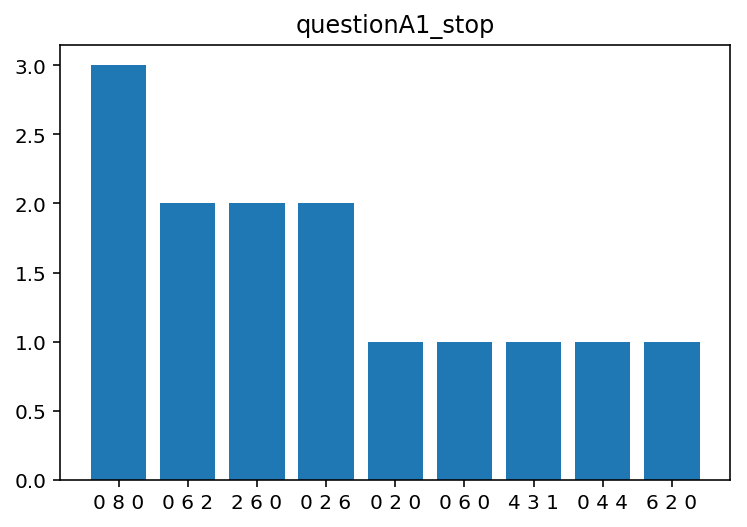

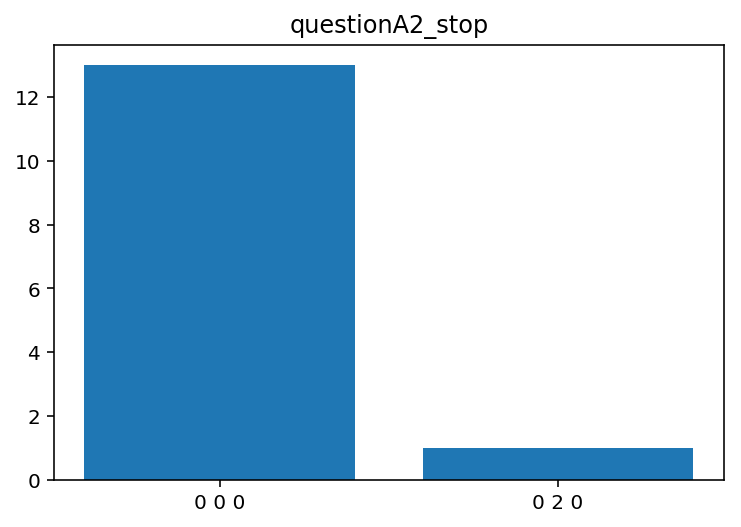

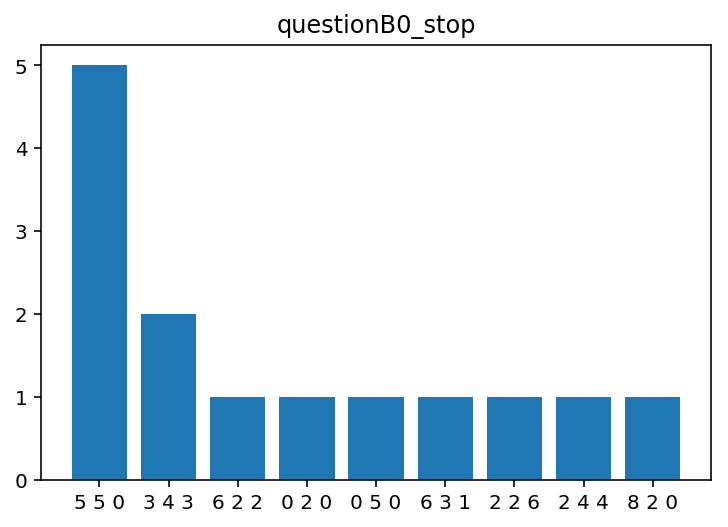

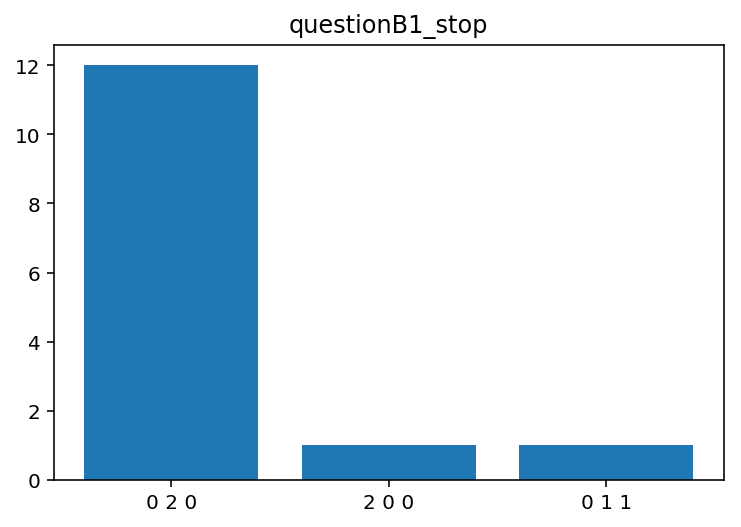

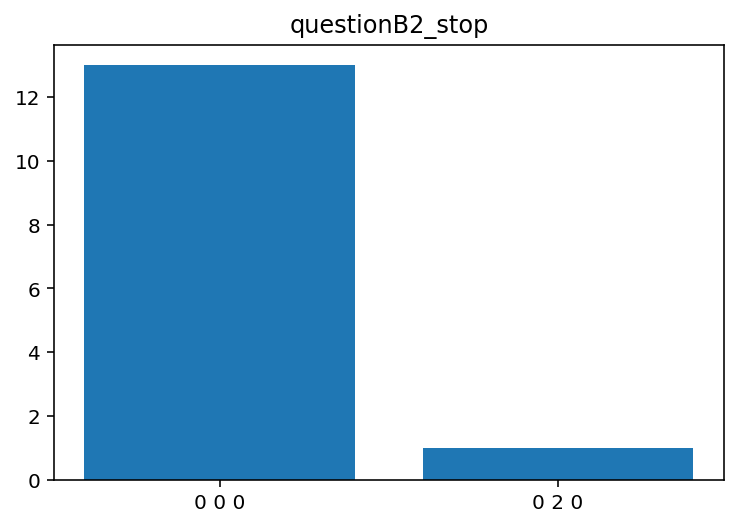

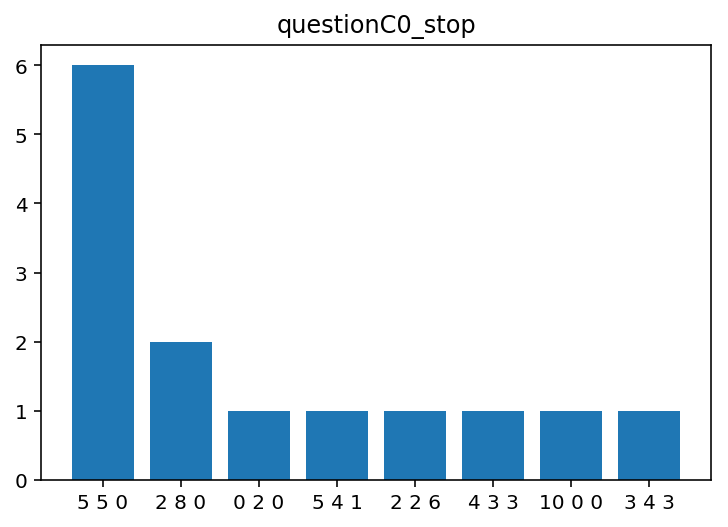

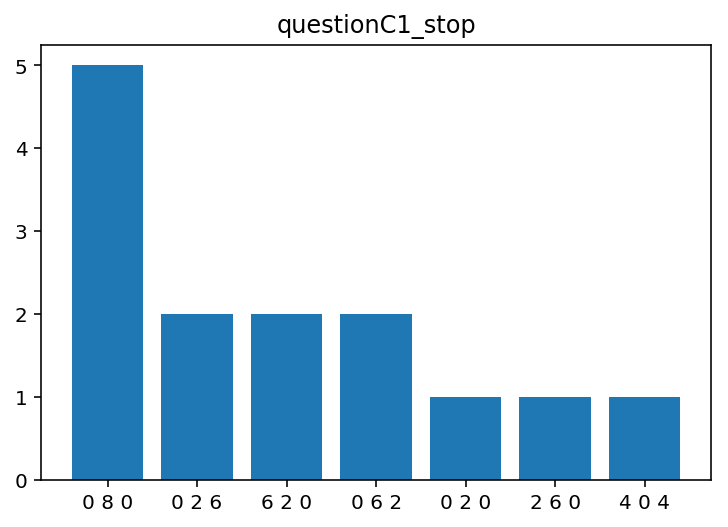

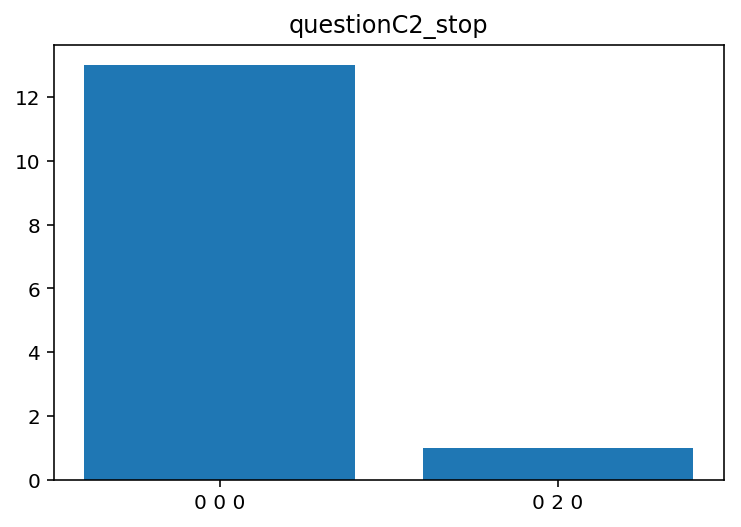

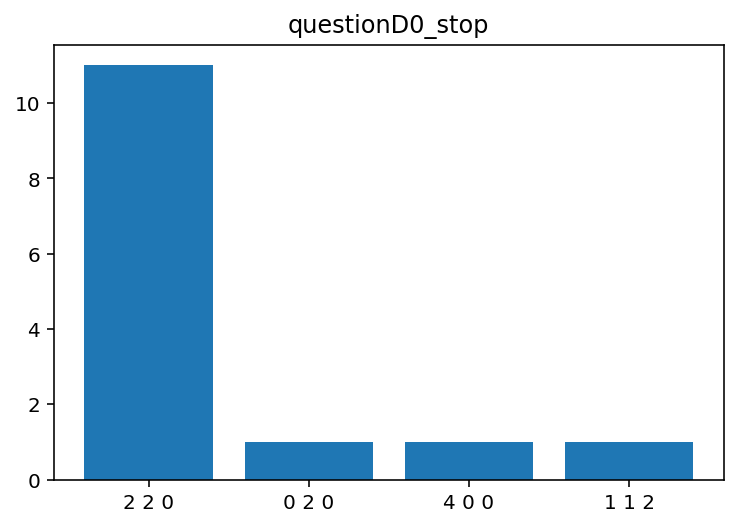

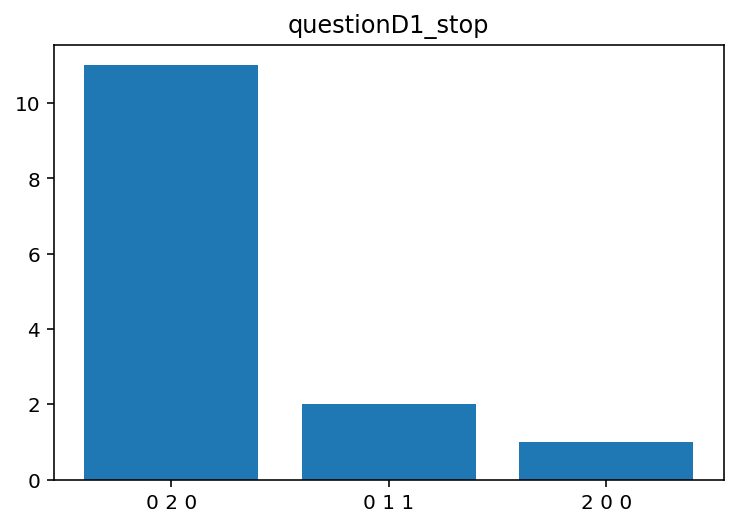

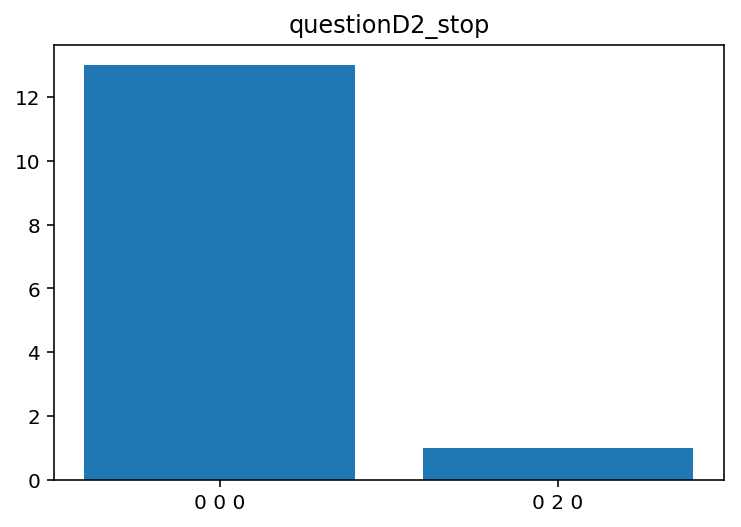

In [58]:
for m in marks:
    plot_allocations(responses, m)

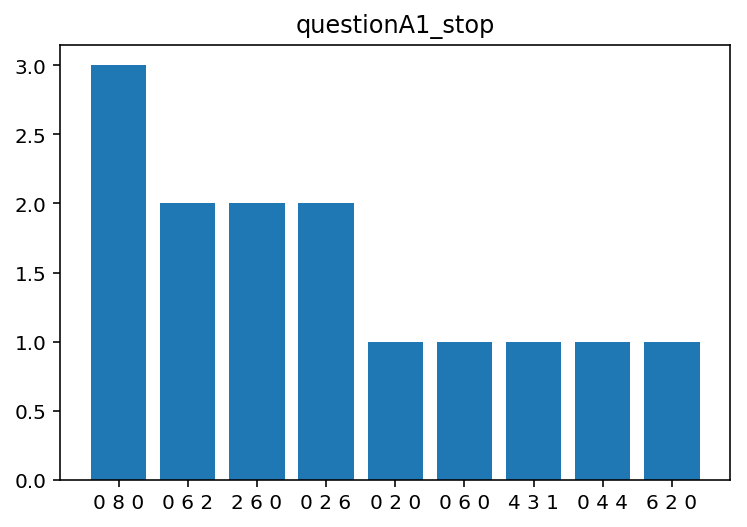

In [55]:
plot_allocations(responses, "questionA1_stop")

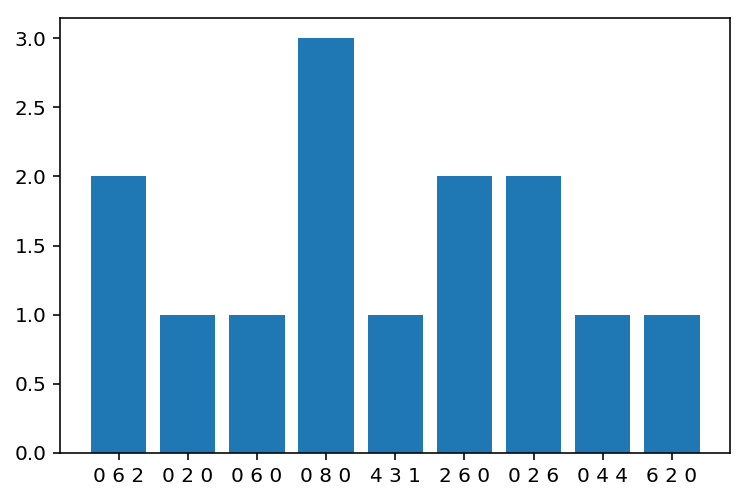

In [45]:
plot_allocations(responses, "questionA1_stop")

In [11]:
a = "aa"

In [12]:
?a.split

Docstring:
S.split(sep=None, maxsplit=-1) -> list of strings

Return a list of the words in S, using sep as the
delimiter string.  If maxsplit is given, at most maxsplit
splits are done. If sep is not specified or is None, any
whitespace string is a separator and empty strings are
removed from the result.
Type:      builtin_function_or_method
